# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción. La regulación del diámetro se hace mediante el control del filawinder. Los datos analizados son del día 16 de Junio del 2015

Los datos del experimento:
* Hora de inicio: 11:50
* Hora final : 12:20
* $T: 150ºC$

In [1]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [3]:
#Abrimos el fichero csv con los datos 2de la muestra
datos = pd.read_csv('ensayo1.CSV')

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','Diametro Y']

In [6]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,Diametro Y
count,1110.000000,1110.000000
mean,1.176870,0.913499
std,0.393488,0.510295
min,0.014000,0.000342
25%,1.069229,0.761755
50%,1.241277,1.092180
75%,1.401856,1.241589
max,1.929470,1.747282


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

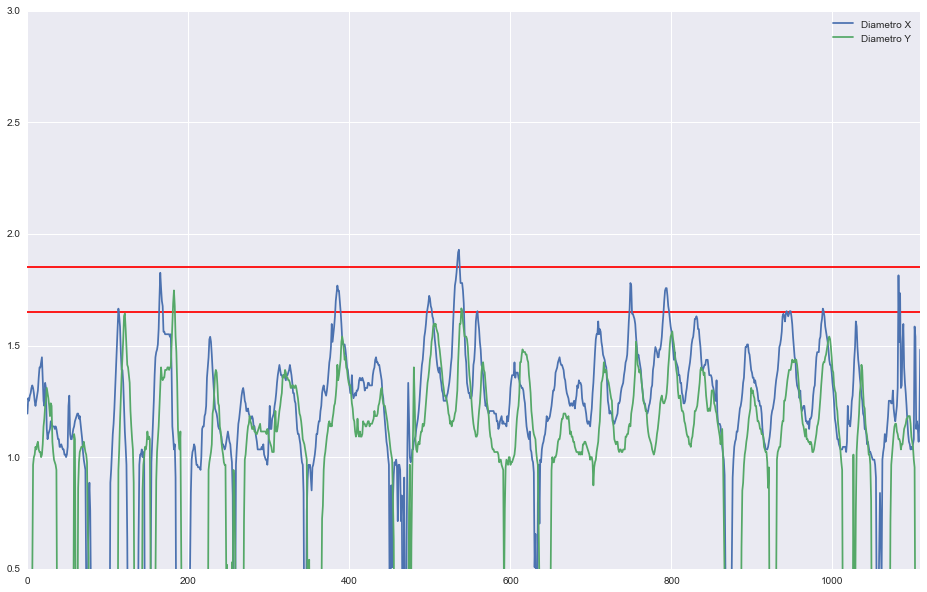

In [7]:
datos.ix[:, "Diametro X":"Diametro Y"].plot(figsize=(16,10),ylim=(0.5,3)).hlines([1.85,1.65],0,3500,colors='r')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

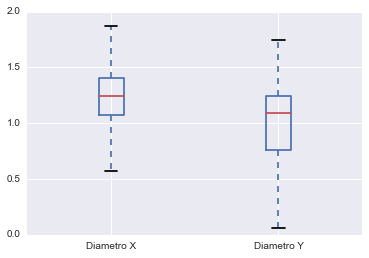

In [8]:
datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

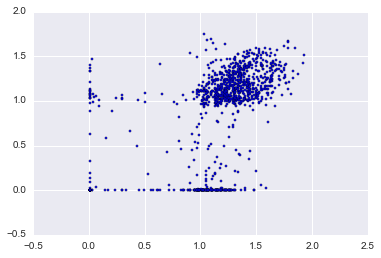

In [9]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [10]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [11]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

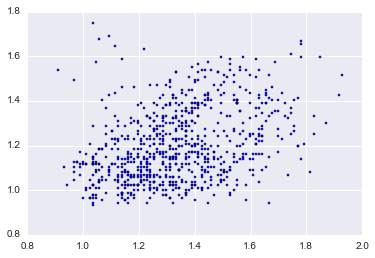

In [12]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [13]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    781.000000
mean       1.123596
std        0.172839
min        0.589877
25%        1.007567
50%        1.107309
75%        1.238627
max        1.766776
dtype: float64

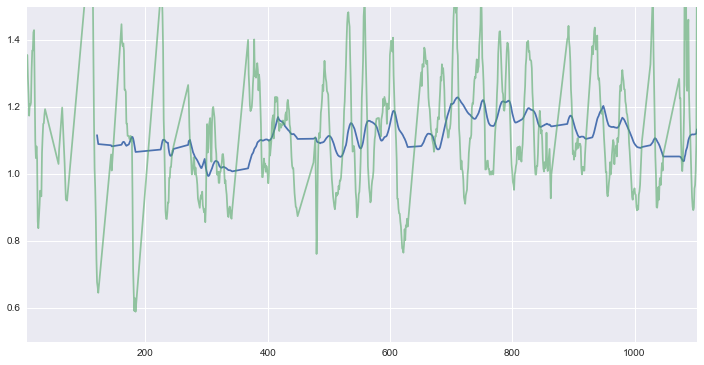

In [14]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [15]:
Th_u = 1.85
Th_d = 1.65

In [16]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [17]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y
count,1108.000000,1108.000000,1108.000000,1108.000000
mean,63.965253,151.223917,1.175781,0.912150
std,0.700247,0.796456,0.393005,0.509765
min,62.900000,149.500000,0.014000,0.000342
25%,63.200000,150.600000,1.069229,0.758882
50%,64.100000,151.200000,1.241277,1.092180
75%,64.600000,151.800000,1.401856,1.241589
max,65.000000,153.200000,1.929470,1.747282


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F7DAE10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0F9B6190>], dtype=object)

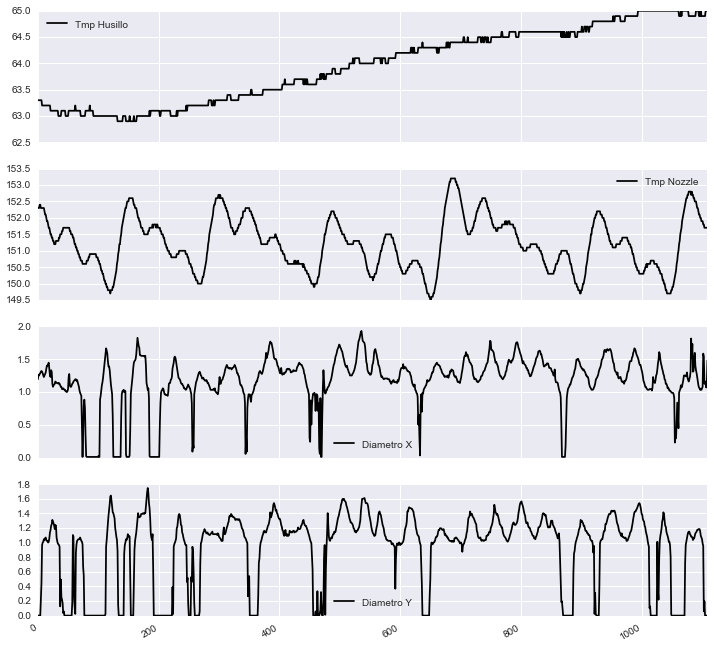

In [18]:
data_violations.plot(subplots=True, figsize=(12,12))